In [1]:
# Import package
import tweepy
import json

%run keys_tokens.py

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [2]:
# Generate a listener class
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [3]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['Jason Kenney', 'Rachel Notley', 'Stephen Mandel', r'@jkenney', r'@RachelNotley', r'@SMandel_AB'], languages=['en'])

In [4]:
# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [5]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @abraaten: But, the CBC said @jkenney would...   en
1  RT @True_Canuck1: I guess Quebec is not into A...   en
2  @jkenney Bluster! Loud noises! Don't look behi...   en
3  @btg456 @politicalham @akaRCN @RachelNotley @j...   en
4  @GNadeauDubois @jkenney Now let's adopt a poli...   en


In [6]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [7]:
# Initialize list to store tweet counts
[Rachel_Notley, Stephen_Mandel, Jason_Kenney] = [0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    Rachel_Notley += word_in_text('Rachel Notley', row['text'])
    Jason_Kenney += word_in_text('Jason Kenney', row['text'])
    Stephen_Mandel += word_in_text('Stephen Mandel', row['text'])
    Rachel_Notley += word_in_text(r'@RachelNotley', row['text'])
    Jason_Kenney += word_in_text(r'@jkenney', row['text'])
    Stephen_Mandel += word_in_text(r'@SMandel_AB', row['text'])

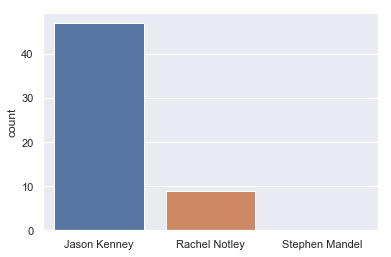

In [8]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['Jason Kenney', 'Rachel Notley', 'Stephen Mandel']

# Plot histogram
ax = sns.barplot(cd, [Jason_Kenney, Rachel_Notley, Stephen_Mandel])
ax.set(ylabel="count")
plt.show()

In [9]:
english = df[df['lang'] == 'en']

In [10]:
english_text = []

for tweet in english['text']:
    english_text.append(tweet)

In [11]:
english_text

['RT @abraaten: But, the CBC said @jkenney would scare investment dollars away. /s https://t.co/HeXD2HYdBg',
 "RT @True_Canuck1: I guess Quebec is not into Alberta's money either, huh? https://t.co/3dVC6HSJHa",
 "@jkenney Bluster! Loud noises! Don't look behind that curtain!",
 "@btg456 @politicalham @akaRCN @RachelNotley @jkenney Maybe Kenney can't throw a tantrum until he gets sworn in, on April 30, I believe.",
 "@GNadeauDubois @jkenney Now let's adopt a policy that you don't get one damn dime from Alberta from this point on.",
 '@PremierScottMoe @jkenney Seriously do you have mush for brains! Educate yourself on how equalization works, better… https://t.co/JQiy2ZBrSS',
 'RT @roaddogger: @ghost1144 @PointBreakout @HangryMale @moneyaftergrad Just wait Alberta, u ain’t seen nothing yet😳https://t.co/gtRfqPxYKI',
 'RT @humourme1234: @ThatsMrNeil I considered this tweet more and endorse it.\n\nSeems to me the Midwest is a foregone conclusion for Libs. Pit…',
 'RT @HarshaWalia: I have rec

In [12]:
(Jason_Kenney, Rachel_Notley, Stephen_Mandel)

(47, 9, 0)